In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile 

In [2]:
df=pd.read_csv('german_credit_risk.zip',compression='zip')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
# Age (numeric)
# Sex (text: male, female)

# Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident,
# 2 - skilled, 3 - highly skilled)

# Housing (text: own, rent, or free)
# Saving accounts (text - little, moderate, quite rich, rich)
# Checking account
# Credit amount (numeric, in DM)
# Duration (numeric, in month)
# Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, 
# repairs, education, business, vacation/others
# Risk (target Variable - Good or Bad Risk)

In [4]:
df.shape

(1000, 11)

#### Count Percentage of Null Values

In [5]:
def fetch_count_percent_null(data):
    nv = data.isnull().sum()
    nv = nv[nv>0]
    nv_df = pd.DataFrame({'Feature':nv.index,'Count':nv.values,
                         'Percent':(nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('Percent',ascending=False)
    return nv_df

In [6]:
nv_df = fetch_count_percent_null(df)
nv_df

,Feature,Count,Percent
1,Checking account,394,39.4
0,Saving accounts,183,18.3


In [7]:
df['Checking account'].value_counts(dropna=False)

Checking account
NaN         394
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [8]:
df['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [9]:
df.groupby(['Risk','Checking account'])['Checking account'].count()

Risk  Checking account
bad   little              135
      moderate            105
      rich                 14
good  little              139
      moderate            164
      rich                 49
Name: Checking account, dtype: int64

In [10]:
mode_grp=df.groupby('Risk')['Checking account'].transform(lambda x : x.mode()[0])
print(mode_grp.shape)
mode_grp[:10]

(1000,)


0    moderate
1      little
2    moderate
3    moderate
4      little
5    moderate
6    moderate
7    moderate
8    moderate
9      little
Name: Checking account, dtype: object

In [11]:
df['Checking account']=df['Checking account'].fillna(mode_grp)
df['Checking account'].value_counts(dropna=False)

Checking account
moderate    617
little      320
rich         63
Name: count, dtype: int64

In [12]:
df.groupby(['Saving accounts','Risk'])['Saving accounts'].count()

Saving accounts  Risk
little           bad     217
                 good    386
moderate         bad      34
                 good     69
quite rich       bad      11
                 good     52
rich             bad       6
                 good     42
Name: Saving accounts, dtype: int64

In [13]:
df['Saving accounts']=df['Saving accounts'].fillna('Other')

## Duplicates

In [14]:
df.duplicated().sum()

0

In [15]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

## Separate Num and Categorical Feature

In [16]:
cat_cols=df.dtypes[df.dtypes=='object'].index
num_cols=df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')
Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')


In [17]:
df['Job'].value_counts()

Job
2    630
1    200
3    148
0     22
Name: count, dtype: int64

In [18]:
df['Duration'].value_counts()

Duration
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: count, dtype: int64

## EDA

#### Countplot

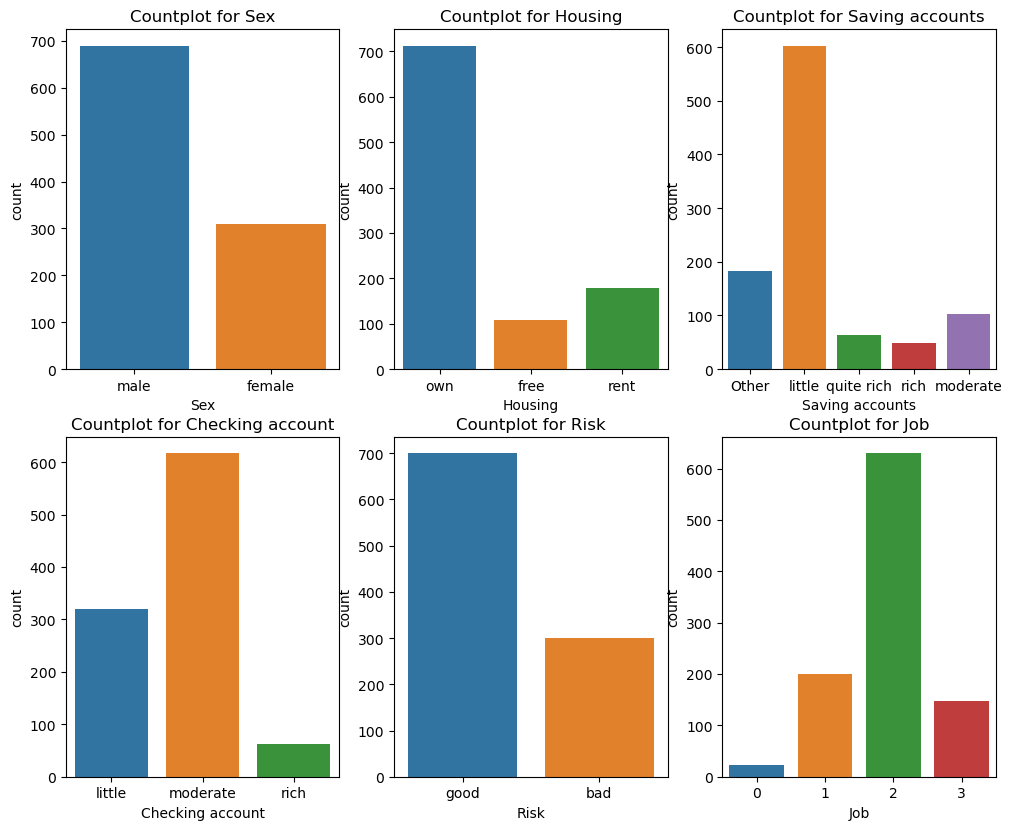

In [19]:
cols=['Sex', 'Housing', 'Saving accounts', 'Checking account',
       'Risk','Job']
plt.figure(figsize=(12,15))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')
plt.show()

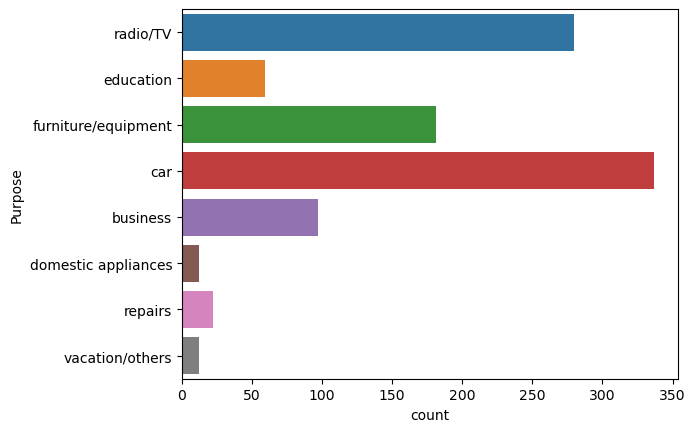

In [20]:
sns.countplot(y=df['Purpose'])
plt.show()

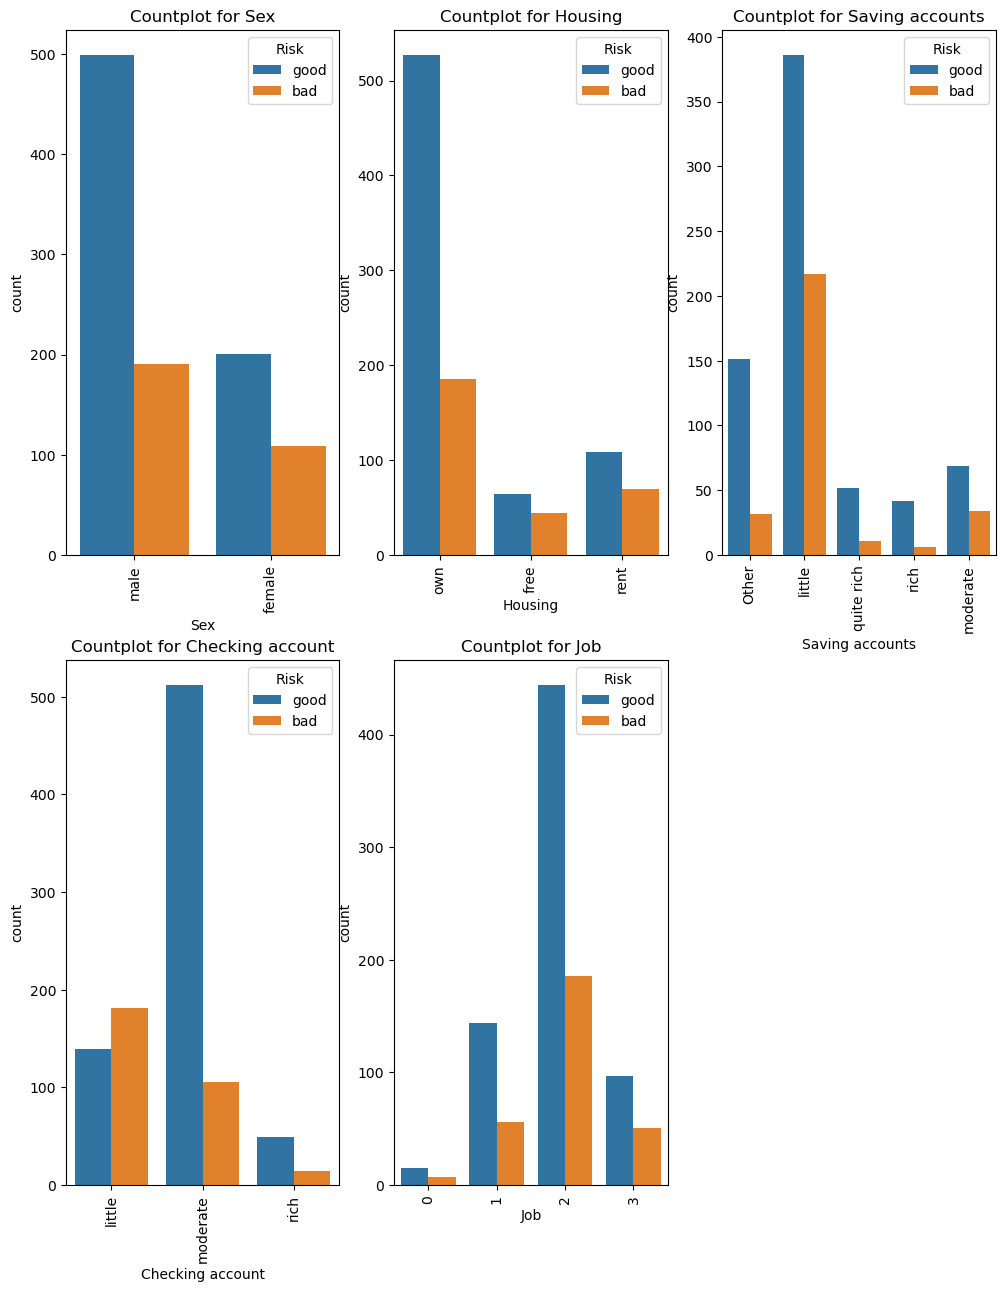

In [21]:
cols=['Sex', 'Housing', 'Saving accounts', 'Checking account','Job']
plt.figure(figsize=(12,15))
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    sns.countplot(x=df[cols[i]],hue=df['Risk'])
    plt.title(f'Countplot for {cols[i]}')
    plt.xticks(rotation=90)
plt.show()

In [22]:
print(num_cols)

Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')


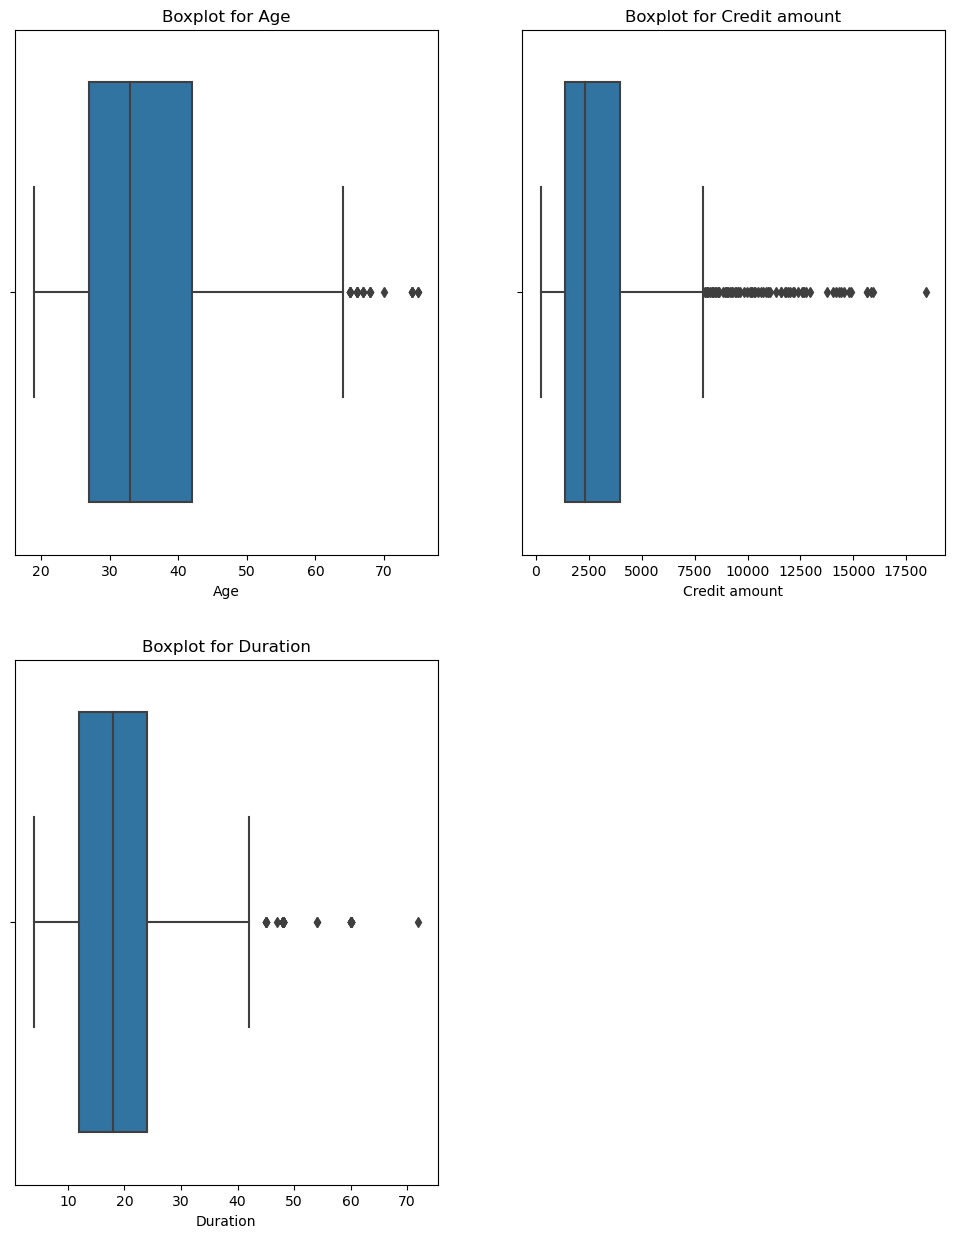

In [23]:
cols=['Age',  'Credit amount', 'Duration']
plt.figure(figsize=(12,15))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')
plt.show()

C:\Users\jyoti\AppData\Local\Temp\ipykernel_17348\4205523977.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[cols[i]])
C:\Users\jyoti\AppData\Local\Temp\ipykernel_17348\4205523977.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[cols[i]])
C:\Users\jyoti\AppData\Local\Temp\ipyker

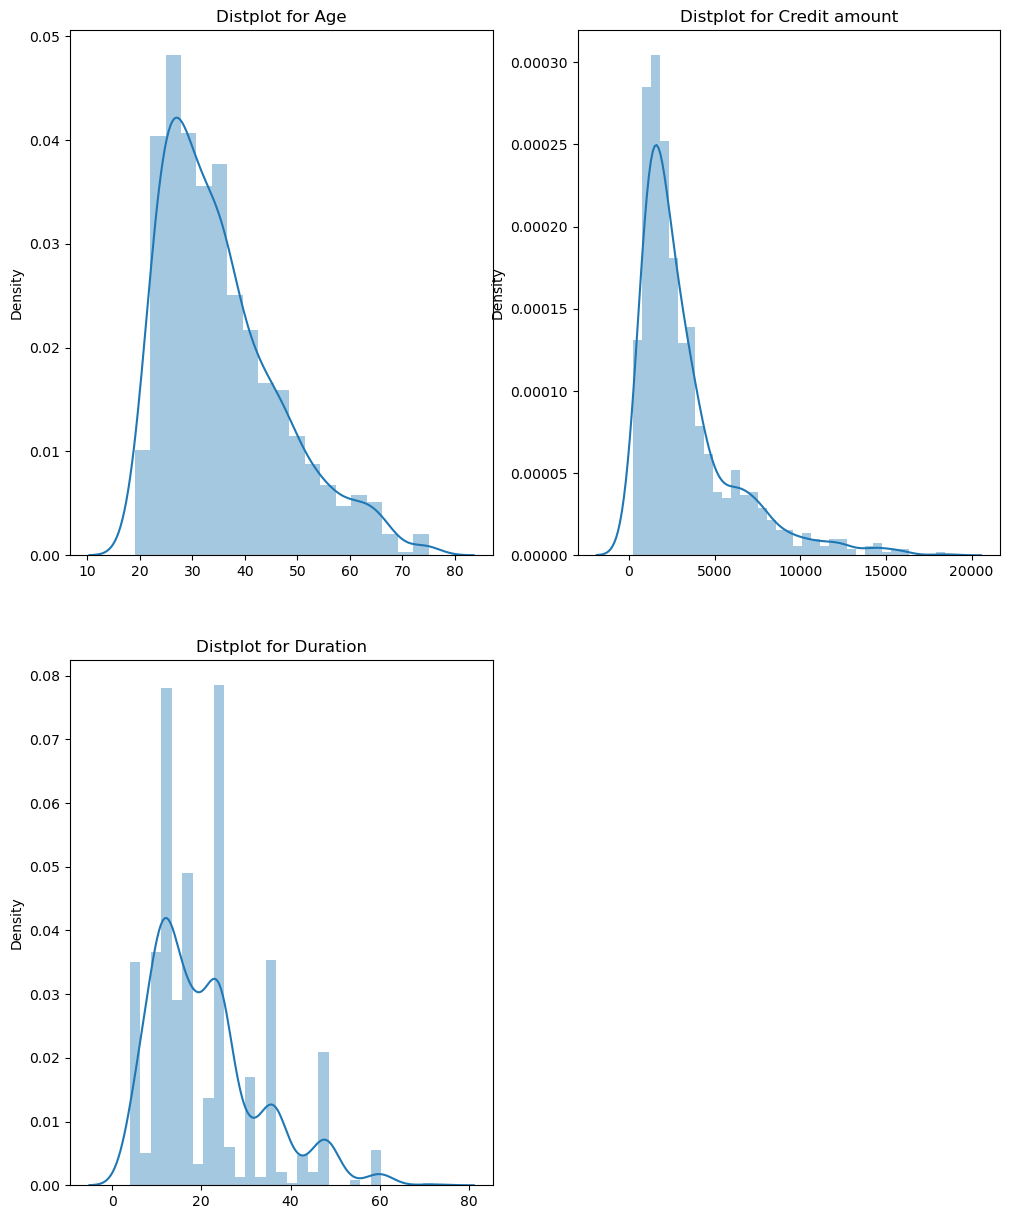

In [24]:
cols=['Age',  'Credit amount', 'Duration']
plt.figure(figsize=(12,15))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.distplot(x=df[cols[i]])
    plt.title(f'Distplot for {cols[i]}')
plt.show()

## Correlation

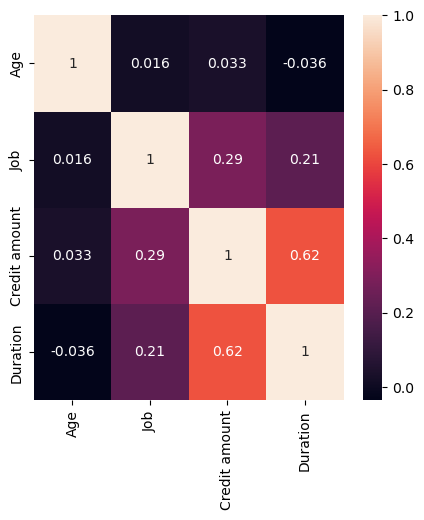

In [25]:
corr=df[num_cols].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr,annot=True)
plt.show()

## Outliers Treatment

In [26]:
a = df.describe(percentiles=[0.01,0.02,0.05,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,5%,50%,95%,97%,98%,99%,max
Age,19.0,20.00,21.00,22.00,33.0,60.0,63.00,65.0,67.01,75.0
Job,0.0,0.00,0.00,1.00,2.0,3.0,3.00,3.0,3.00,3.0
Credit amount,250.0,425.83,570.02,708.95,2319.5,9162.7,10961.39,12169.7,14180.39,18424.0
Duration,4.0,6.00,6.00,6.00,18.0,48.0,48.00,48.0,60.00,72.0


In [27]:
print(df[df['Credit amount']>7500].shape)
print(df[df['Credit amount']>9162.7].shape)
print(df[df['Credit amount']>14189.39].shape)
print(df[df['Credit amount']>12169.7].shape)   # clip threshold
print(df[df['Duration']>48].shape)
print(df[df['Age']>68].shape)

(86, 10)
(50, 10)
(10, 10)
(20, 10)
(16, 10)
(7, 10)


### Outlier Treatment using IQR Method

In [28]:
cols=['Age',  'Credit amount', 'Duration']

for i in cols:
    upper= df[i].quantile(0.98)
    print(i,upper)
    df[i]=np.where(df[i]>upper,upper,df[i])

Age 65.0
Credit amount 12169.699999999999
Duration 48.0


In [29]:
a = df.describe(percentiles=[0.01,0.02,0.05,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,5%,50%,95%,97%,98%,99%,max
Age,19.0,20.00,21.00,22.00,33.0,60.0,63.00,65.000,65.0,65.0
Job,0.0,0.00,0.00,1.00,2.0,3.0,3.00,3.000,3.0,3.0
Credit amount,250.0,425.83,570.02,708.95,2319.5,9162.7,10961.39,12169.014,12169.7,12169.7
Duration,4.0,6.00,6.00,6.00,18.0,48.0,48.00,48.000,48.0,48.0


### Encoding

In [30]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')

In [31]:
for i in cat_cols:
    print(i,df[i].nunique(),df[i].unique())

Sex 2 ['male' 'female']
Housing 3 ['own' 'free' 'rent']
Saving accounts 5 ['Other' 'little' 'quite rich' 'rich' 'moderate']
Checking account 3 ['little' 'moderate' 'rich']
Purpose 8 ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Risk 2 ['good' 'bad']


In [32]:
df['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

## Label Encoder(Encoding Target Variable)

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
lb = LabelEncoder()
df['Risk'] = lb.fit_transform(df['Risk'])

In [35]:
df['Risk'].value_counts()
# Good = 1
# Bad = 0

Risk
1    700
0    300
Name: count, dtype: int64

## Dummy Variables

In [36]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')

In [37]:
df_dum = pd.get_dummies(df,columns=['Sex', 'Housing', 
                                         'Saving accounts', 
                                         'Checking account', 
                                         'Purpose'],drop_first=True,
                                         dtype=int)
print(df_dum.shape)
print(df_dum.columns)

(1000, 21)
Index(['Age', 'Job', 'Credit amount', 'Duration', 'Risk', 'Sex_male',
       'Housing_own', 'Housing_rent', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_moderate',
       'Checking account_rich', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others'],
      dtype='object')


## Select X and y

In [38]:
x = df_dum.drop(['Risk'],axis=1)
y = df_dum['Risk']
print(x.shape)
print(y.shape)

(1000, 20)
(1000,)


## Split Data into Train and Test

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                 random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 20)
(300, 20)
(700,)
(300,)


## Function to Evaluate Model

In [41]:
from sklearn.metrics import *

In [42]:
def eval_model(model,x_train,x_test,y_train,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    print(classification_report(y_test,ypred))
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    pre1 = precision_score(y_test,ypred)
    rec1 = recall_score(y_test,ypred)
    pre0 = precision_score(y_test,ypred,pos_label=0)
    rec0 = recall_score(y_test,ypred,pos_label=0)
    res = pd.DataFrame({'Train_Acc':train_acc,'test_Acc':test_acc,
                       'Pre0':pre0,'Rec0':rec0,'Pre1':pre1,'Rec1':rec1,
                       },index=[mname])
    return res, ypred

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

## LogReg

In [44]:
lr1 = LogisticRegression(max_iter=1000)
lr1_res,ypred_lr1 = eval_model(lr1,x_train, x_test, 
                               y_train, y_test,'LogReg1')
lr1_res

              precision    recall  f1-score   support

           0       0.68      0.44      0.53        91
           1       0.79      0.91      0.84       209

    accuracy                           0.77       300
   macro avg       0.73      0.67      0.69       300
weighted avg       0.75      0.77      0.75       300



,Train_Acc,test_Acc,Pre0,Rec0,Pre1,Rec1
LogReg1,0.76,0.766667,0.677966,0.43956,0.788382,0.909091


## DT- Not Prunning

In [45]:
dt1 = DecisionTreeClassifier(criterion='entropy')

dt1_res, ypred_dt1 = eval_model(dt1,x_train, x_test, 
                               y_train, y_test,'DT1')
dt1_res

              precision    recall  f1-score   support

           0       0.52      0.55      0.53        91
           1       0.80      0.78      0.79       209

    accuracy                           0.71       300
   macro avg       0.66      0.66      0.66       300
weighted avg       0.71      0.71      0.71       300



,Train_Acc,test_Acc,Pre0,Rec0,Pre1,Rec1
DT1,1.0,0.706667,0.515464,0.549451,0.79803,0.77512


In [46]:
fn = list(x.columns)
cn = ['0','1']

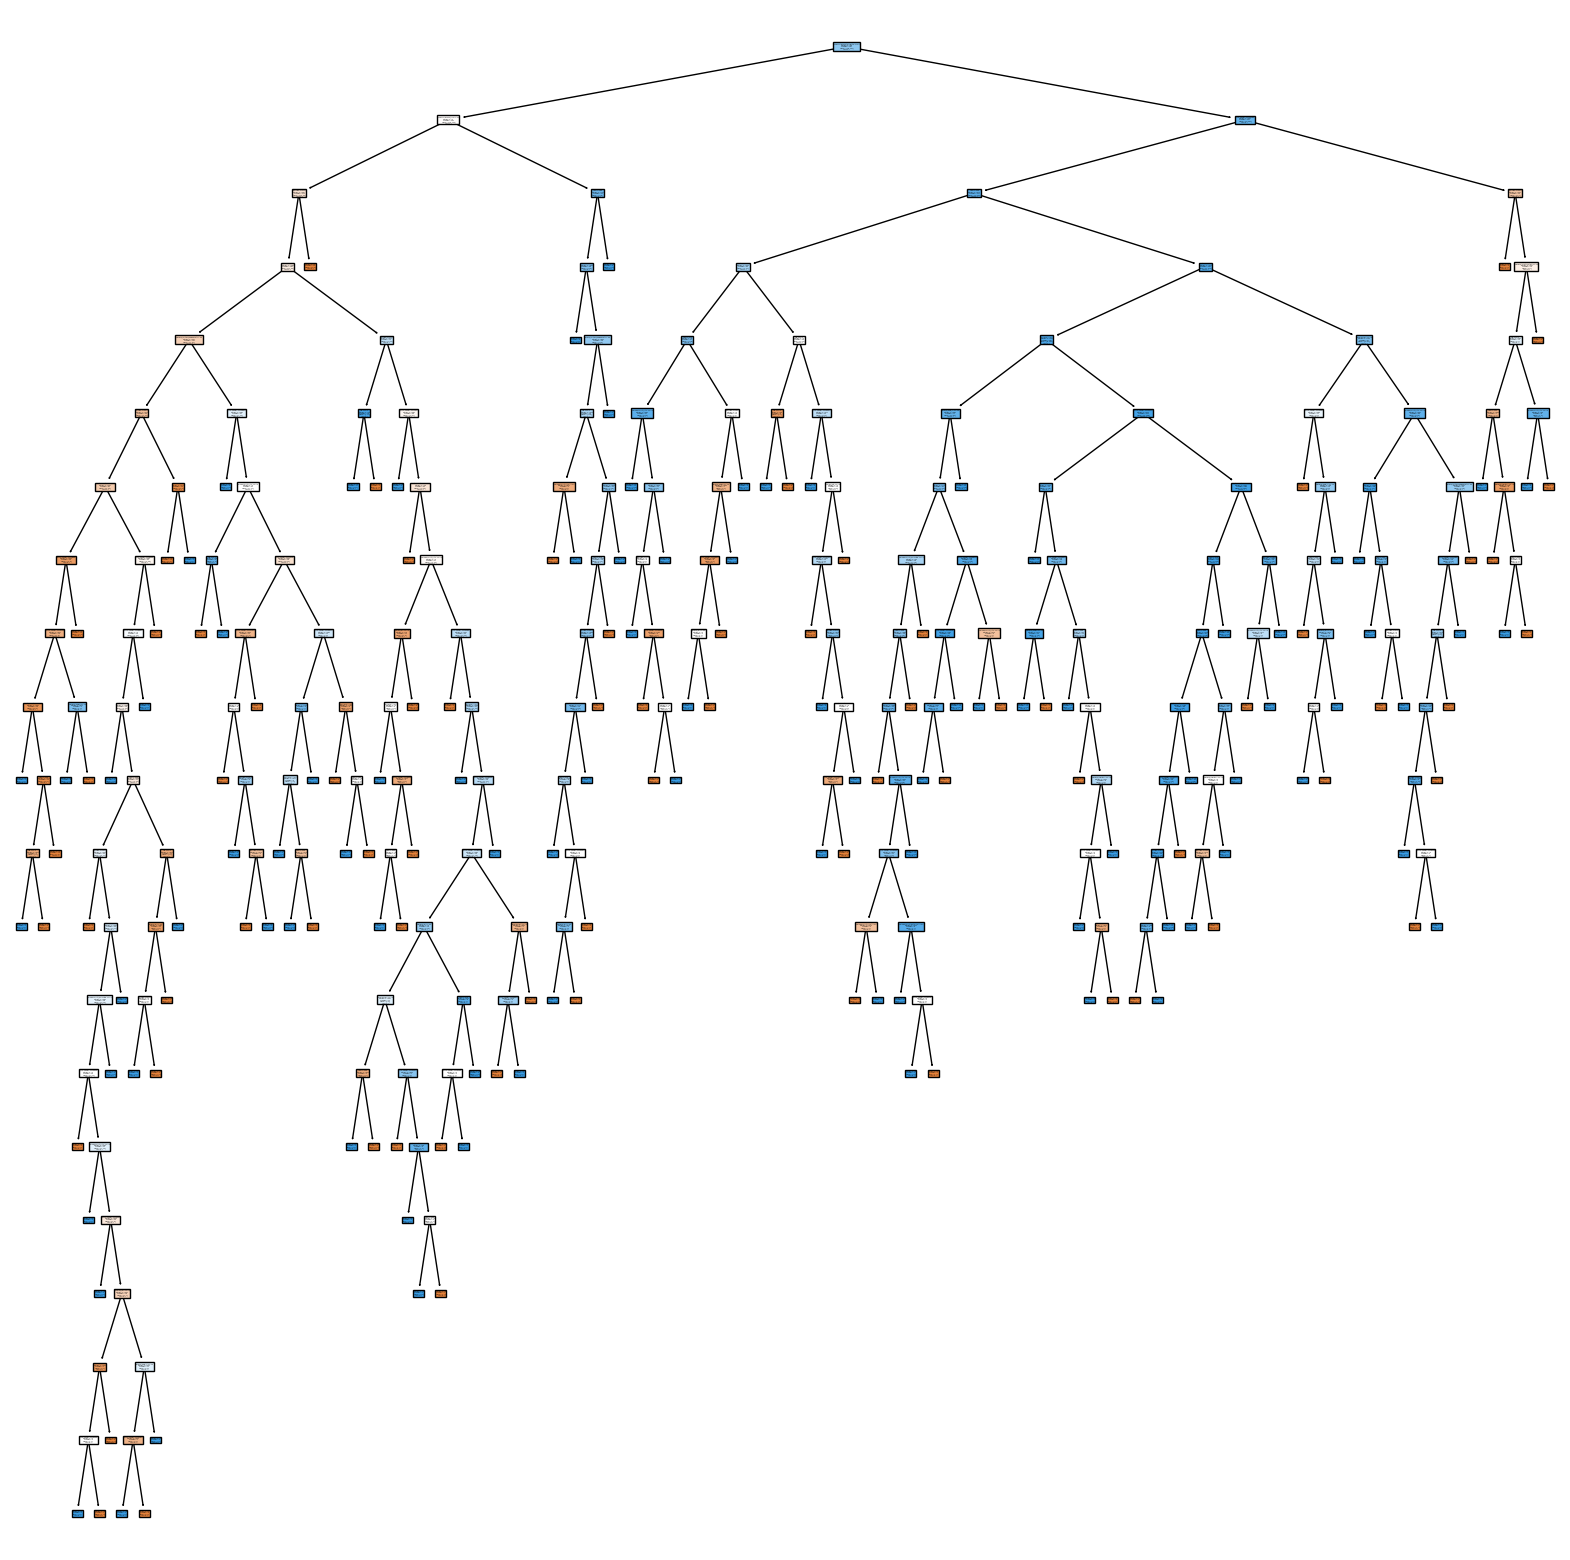

In [47]:
plt.figure(figsize=(20,20))
plot_tree(dt1,feature_names=fn, class_names=cn, filled=True)
plt.show()

In [48]:
dt2 = DecisionTreeClassifier(criterion='gini',max_depth=7,
                             min_samples_split=10)
dt2_res, ypred_dt2 = eval_model(dt2,x_train, x_test, 
                               y_train, y_test,'DT2(Pruned Tree)')
dt2_res

              precision    recall  f1-score   support

           0       0.54      0.55      0.55        91
           1       0.80      0.80      0.80       209

    accuracy                           0.72       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.72      0.72      0.72       300



,Train_Acc,test_Acc,Pre0,Rec0,Pre1,Rec1
DT2(Pruned Tree),0.85,0.723333,0.543478,0.549451,0.802885,0.799043


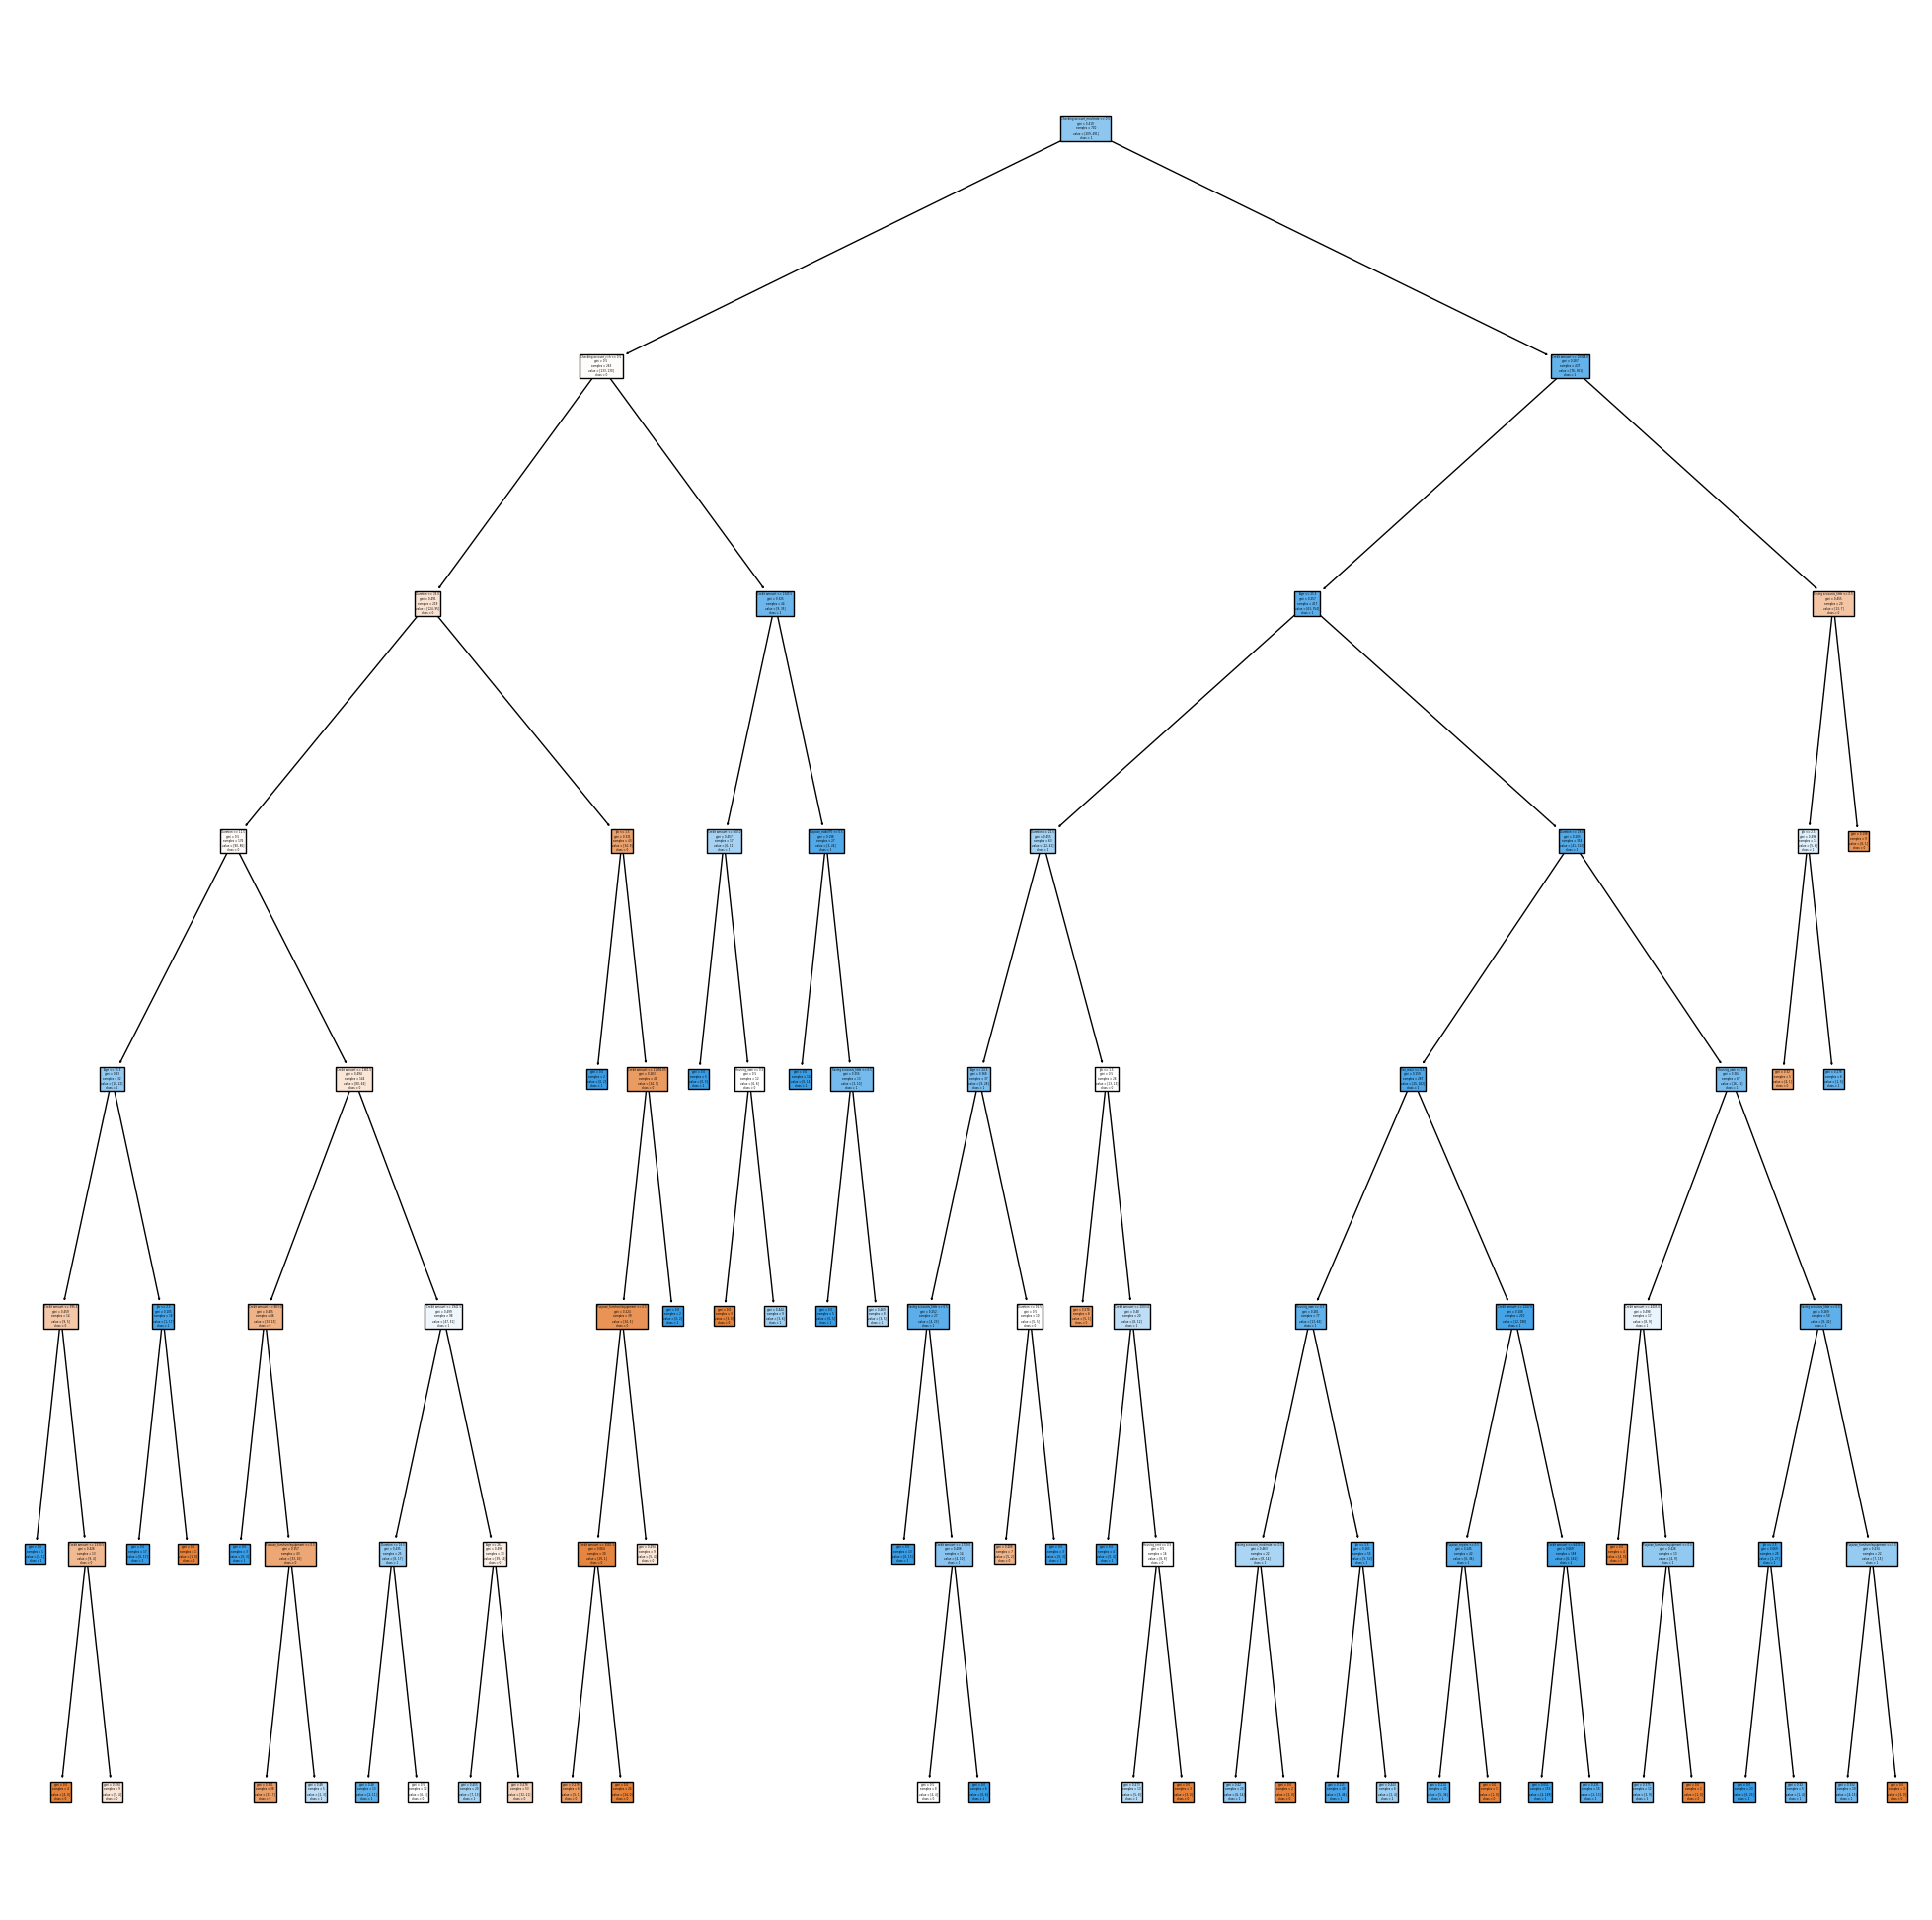

In [49]:
plt.figure(figsize=(25,25))
plot_tree(dt2,feature_names=fn, class_names=cn, filled=True)
plt.show()

In [50]:
print(export_text(dt2,feature_names=x.columns.tolist()))

|--- Checking account_moderate <= 0.50
|   |--- Checking account_rich <= 0.50
|   |   |--- Duration <= 33.00
|   |   |   |--- Duration <= 11.50
|   |   |   |   |--- Age <= 35.50
|   |   |   |   |   |--- Credit amount <= 395.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Credit amount >  395.50
|   |   |   |   |   |   |--- Credit amount <= 1330.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Credit amount >  1330.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  35.50
|   |   |   |   |   |--- Job <= 2.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Job >  2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Duration >  11.50
|   |   |   |   |--- Credit amount <= 1381.50
|   |   |   |   |   |--- Credit amount <= 663.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Credit amount >  663.00
|   |   |   |   |   |   |--- Purpose_furniture/equipment <= 0.50
|   |   |   |   |   |   |   

In [51]:
print(x.columns)

# Age = 34, Job=3,Duration= 12, Sex_Male= 0 =>

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_male', 'Housing_own',
       'Housing_rent', 'Saving accounts_little', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_moderate', 'Checking account_rich', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')


#### How to find optimal values for max_depth, criterion, mss, msl ?
1) Exceute Model across multiple loops for different hyperparamters. <br>
2) Cross Validation<br>
3) Hyperparameter Tuning<br>

## Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
crit = ['gini','entropy']
md   = [5,7,9,10]
mss = [10,12,15,20]

c = 0
for i in crit:
    for j in md:
         for k in mss:
                scores = cross_val_score(DecisionTreeClassifier(criterion=i,
                                                                max_depth=j,
                                                                min_samples_split=k),
                                         x,y,scoring='accuracy',cv=5)
                # cv = number of splits
                c += 1
                print('Scores',scores)
                print(f'Iteration {c}, cri:{i},md:{j},mss:{k},Mean_Scores : {scores.mean()}')

Scores [0.76  0.715 0.715 0.75  0.77 ]
Iteration 1, cri:gini,md:5,mss:10,Mean_Scores : 0.742
Scores [0.76  0.715 0.715 0.745 0.765]
Iteration 2, cri:gini,md:5,mss:12,Mean_Scores : 0.74
Scores [0.76  0.715 0.725 0.745 0.765]
Iteration 3, cri:gini,md:5,mss:15,Mean_Scores : 0.7420000000000001
Scores [0.765 0.72  0.725 0.745 0.76 ]
Iteration 4, cri:gini,md:5,mss:20,Mean_Scores : 0.743
Scores [0.71  0.715 0.71  0.715 0.765]
Iteration 5, cri:gini,md:7,mss:10,Mean_Scores : 0.723
Scores [0.71  0.72  0.715 0.71  0.78 ]
Iteration 6, cri:gini,md:7,mss:12,Mean_Scores : 0.727
Scores [0.715 0.715 0.73  0.71  0.765]
Iteration 7, cri:gini,md:7,mss:15,Mean_Scores : 0.7270000000000001
Scores [0.725 0.725 0.73  0.725 0.775]
Iteration 8, cri:gini,md:7,mss:20,Mean_Scores : 0.736
Scores [0.66  0.72  0.66  0.685 0.725]
Iteration 9, cri:gini,md:9,mss:10,Mean_Scores : 0.6900000000000001
Scores [0.67  0.7   0.69  0.695 0.73 ]
Iteration 10, cri:gini,md:9,mss:12,Mean_Scores : 0.697
Scores [0.665 0.685 0.705 0.68 

#### Best Hyperparamters (based on Cross Validation)
1) cri:gini,md:5,mss:10<br>
2) cri:gini,md:5,mss:20

### HyperParameter Tuning Methods

#### 1) GridSearchCV 
a) Applies ML model on all possible combinations of Hyperparameters and
then selects the set of Hyperparameter that generates the best result 
based on the metric used.<br>
b) High time complexity.


#### 2) RandomizedSearchCV
a) Applies ML model on random subset(default = 10) of all possible combinations of Hyperparameters and
then selects the set of Hyperparameter that generates the best result out of that subset
based on the metric used.<br>
b) Low time complexity.

#### GridSearchCV

In [56]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [57]:
hparams_dt = {'criterion': ['gini','entropy'],
             'max_depth': [5,6,7,8,9],
             'min_samples_split': [8,10,12,15,20]}

# Total Combinations
print(2*5*5)   
print(hparams_dt)

50
{'criterion': ['gini', 'entropy'], 'max_depth': [5, 6, 7, 8, 9], 'min_samples_split': [8, 10, 12, 15, 20]}


In [58]:
dt_base = DecisionTreeClassifier()
gs1 = GridSearchCV(estimator=dt_base,param_grid=hparams_dt,
                   scoring='accuracy',cv=5)
gs1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'min_samples_split': [8, 10, 12, 15, 20]},
             scoring='accuracy')

In [60]:
print(gs1.best_score_)  # best mean score (across 5 splits)
print(gs1.best_params_)

0.7014285714285714
{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 10}


In [61]:
gs_df = pd.DataFrame(gs1.cv_results_)
print(gs_df.shape)
gs_df.columns

(50, 16)


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [62]:
gs_df = gs_df[['param_criterion', 'param_max_depth', 
               'param_min_samples_split',
               'mean_test_score','rank_test_score']]
gs_df = gs_df.sort_values('rank_test_score')
gs_df.head()

,param_criterion,param_max_depth,param_min_samples_split,mean_test_score,rank_test_score
6,gini,6,10,0.701429,1
1,gini,5,10,0.700000,2
0,gini,5,8,0.698571,3
4,gini,5,20,0.697143,4
30,entropy,6,8,0.697143,4


### DT after GrdiSearchCV

In [63]:
print(gs1.best_score_)
print(gs1.best_params_)

0.7014285714285714
{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 10}


# kwargs :-  **

In [64]:
dt3 = DecisionTreeClassifier(**gs1.best_params_)
dt3_res,ypred_dt3 = eval_model(dt3,x_train, x_test, y_train, 
                              y_test,'DT3(After GS)')
dt3_res

              precision    recall  f1-score   support

           0       0.55      0.56      0.56        91
           1       0.81      0.80      0.81       209

    accuracy                           0.73       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.73      0.73      0.73       300



,Train_Acc,test_Acc,Pre0,Rec0,Pre1,Rec1
DT3(After GS),0.824286,0.73,0.554348,0.56044,0.807692,0.803828


#### RandomizedSearchCV

In [65]:
print(hparams_dt)

{'criterion': ['gini', 'entropy'], 'max_depth': [5, 6, 7, 8, 9], 'min_samples_split': [8, 10, 12, 15, 20]}


In [66]:
dt_base2 = DecisionTreeClassifier()

rs1 = RandomizedSearchCV(estimator=dt_base2, param_distributions=hparams_dt,
                        scoring='accuracy',cv=5,n_iter=20)
rs1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6, 7, 8, 9],
                                        'min_samples_split': [8, 10, 12, 15,
                                                              20]},
                   scoring='accuracy')

In [67]:
print(rs1.best_score_)
print(rs1.best_params_)

0.7
{'min_samples_split': 10, 'max_depth': 6, 'criterion': 'gini'}


In [68]:
rs_df =  pd.DataFrame(rs1.cv_results_)
print(rs_df.shape)
rs_df.columns

(20, 16)


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_min_samples_split', 'param_max_depth', 'param_criterion',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [69]:
rs_df = rs_df[['param_criterion', 'param_max_depth', 
               'param_min_samples_split',
               'mean_test_score','rank_test_score']]

rs_df = rs_df.sort_values('rank_test_score')

rs_df.head()

,param_criterion,param_max_depth,param_min_samples_split,mean_test_score,rank_test_score
13,gini,6,10,0.700000,1
7,gini,6,8,0.698571,2
14,gini,6,15,0.694286,3
12,entropy,6,15,0.694286,3
0,entropy,5,10,0.692857,5


### DT after RandomizedSearchCV

In [70]:
dt4 = DecisionTreeClassifier(**rs1.best_params_)
dt4_res,ypred_dt4 = eval_model(dt4,x_train, x_test, y_train, y_test,
                             'DT(After RS)')
dt4_res

              precision    recall  f1-score   support

           0       0.56      0.58      0.57        91
           1       0.82      0.80      0.81       209

    accuracy                           0.74       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.74      0.74      0.74       300



,Train_Acc,test_Acc,Pre0,Rec0,Pre1,Rec1
DT(After RS),0.825714,0.736667,0.56383,0.582418,0.815534,0.803828


In [71]:
all_res = pd.concat([lr1_res,dt1_res,dt2_res,dt3_res,dt4_res])
all_res

,Train_Acc,test_Acc,Pre0,Rec0,Pre1,Rec1
LogReg1,0.760000,0.766667,0.677966,0.439560,0.788382,0.909091
DT1,1.000000,0.706667,0.515464,0.549451,0.798030,0.775120
DT2(Pruned Tree),0.850000,0.723333,0.543478,0.549451,0.802885,0.799043
DT3(After GS),0.824286,0.730000,0.554348,0.560440,0.807692,0.803828
DT(After RS),0.825714,0.736667,0.563830,0.582418,0.815534,0.803828


### Model Saving

In [72]:
import pickle

In [73]:
# Serialization
pickle.dump(dt4,open('dt_credit_risk_22Feb.pkl','wb'))

In [74]:
# deserialization
model = pickle.load(open('dt_credit_risk_22Feb.pkl','rb'))

In [75]:
### SQL
# window functions - rank, dense_rank,row_number, lead, lag, ntile
# stored procedure, functions, triggers, cte

# SQL, Python, Stats, Tableau, Power BI, ML
# SQL, Python - 1-2 hr/day

# SQL, Python, Tableau, Power BI, Excel, Pandas, Viz - coding round

# CapStone - (SQL + Tableau/Power BI) + Pandas + Excel

In [76]:
# KPIs - SumSales,Cat - C1, C2, C3 - C1_%Sales = 

# Filter (Yr) = 2020
# CY_Sales = 50000, PY_Sales = 70000, YOY%_Sales = 

In [77]:
# ypred_dt4

# Cross Validation

# Model Saving - 
# Model Deployment - VS Code - Web App, AWS deploy